In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import wilson_action
from modules import utility

import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation

receiving incremental file list

sent 20 bytes  received 92 bytes  74,67 bytes/sec
total size is 3.942  speedup is 35,20


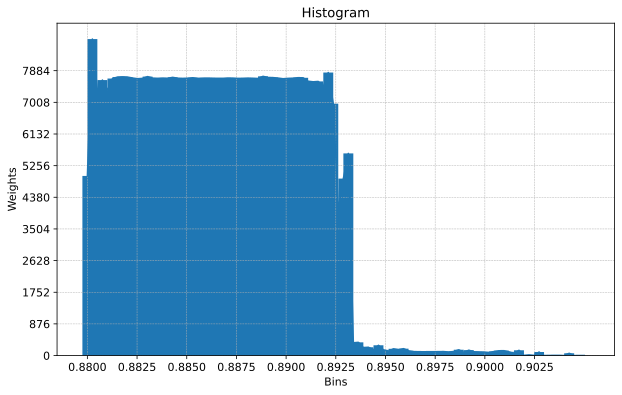

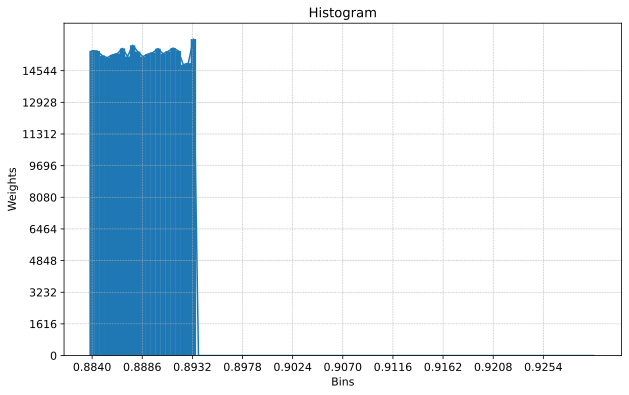

In [2]:
import os
import numpy as np
def plot_histogram(file_path, inverse_log=False):
    # Load the file as a CSV
    data = pd.read_csv(file_path, delimiter='\t', header=0)
    
    if inverse_log:
        data["Weight"] = np.exp(data["Weight"])
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))  # Make the figure a bit bigger
    plt.plot(data["OP_value"][:-1], data["Weight"][:-1])
    plt.bar(data["OP_value"][:-1], data["Weight"][:-1], width=0.0005)
    plt.xlabel('Bins')
    plt.ylabel('Weights')
    plt.title('Histogram')
    
    # Add more ticks and a grid to both axes
    plt.xticks(np.arange(min(data["OP_value"]), max(data["OP_value"]), (max(data["OP_value"]) - min(data["OP_value"])) / 10))
    plt.yticks(np.arange(min(data["Weight"]), max(data["Weight"]), (max(data["Weight"]) - min(data["Weight"])) / 10))
    plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
    
    plt.show()

# Example usage
local = '/home/haaaaron/HILA/applications/suN_gauge_twist/intermediate_weight.dat'
# Define the source and destination paths
source_path = 'lumi.csc.fi:/projappl/project_462000599/haaaaron/HILA/applications/suN_gauge_twist/intermediate_weight.dat'
destination_path = '/home/haaaaron/HILA/applications/suN_gauge_twist/intermediate_weight_lumi.dat'

# Use rsync to fetch the file
os.system(f'rsync -avz {source_path} {destination_path}')
plot_histogram('/home/haaaaron/HILA/applications/suN_gauge_twist/intermediate_weight.dat',inverse_log=False)
plot_histogram('/home/haaaaron/HILA/applications/suN_gauge_twist/intermediate_weight_lumi.dat')
#plot_histogram('/home/haaaaron/HILA/applications/suN_gauge_twist/muca_24_24_36_6_10.789/weight_function_24_24_36_6_10.789')

In [3]:


OP = {}
key, value = read_and_write.load_data_file_real('/home/haaaaron/HILA/applications/suN_gauge_twist/out.txt', 'Order parameter', delim=" ")
OP[key] = value

Data array shape: (460041,)
First row of data: 1.11556


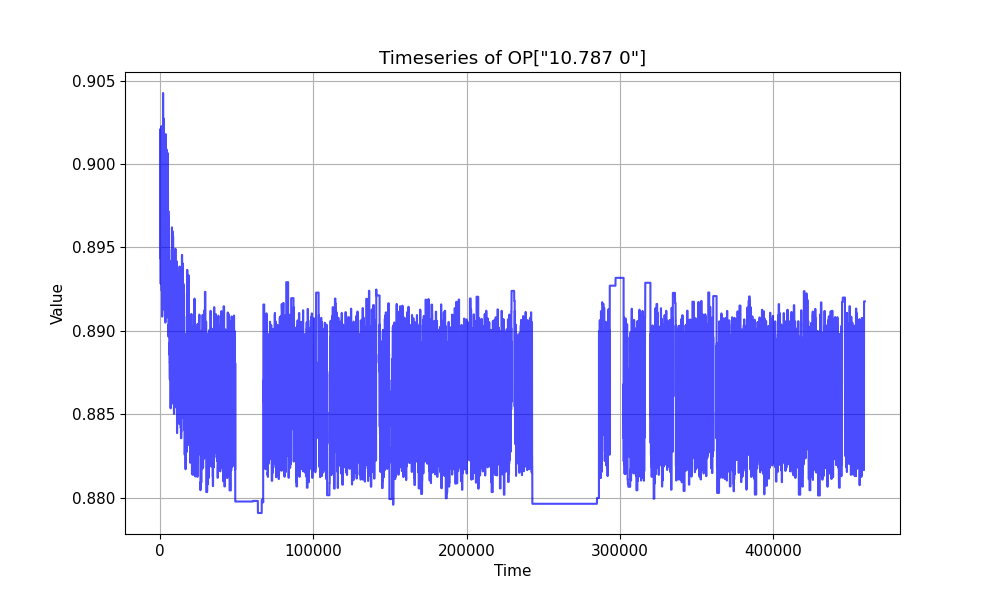

In [4]:
%matplotlib widget

key = list(OP.keys())[0]
data = OP[key]

plt.figure(figsize=(10, 6))
plt.plot(data[100:], color='blue', alpha=0.7)
plt.title(f'Timeseries of OP["{key}"]')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.show()